<a href="https://colab.research.google.com/github/Adil1979/P6_Tag_Recommendation_Stackoverflow/blob/master/Unsupervised_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet6: Catégorisation automatique de questions**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import matplotlib as mpl
#import chart_studio.plotly.plotly as py
from collections import Counter
#import plotly.plotly as py
import seaborn as sns
import datetime as dt
import calendar as cld
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from os import listdir
import glob
import missingno as msno
#from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from sklearn.decomposition import PCA
from matplotlib import dates
import nltk
import re
from nltk.corpus import stopwords 
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer 
import string
from collections import Counter
from bs4 import BeautifulSoup
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import Word2Vec 
random_state = 747

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 9.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=4475fd3d86bf7b861d689b9681b9d4fc7789fcc29453dadc5336df6d6ca79c97
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
questions = pd.read_csv('/content/drive/My Drive/CentraleSupelec_OCR/P6/questions1.csv')
questions = questions.drop('Unnamed: 0', axis=1)
questions

,Title_Body
0,static
1,function function struct
2,mongodb object mongodb api date mongodb object...
3,laravel laravel post post text post post text ...
4,function keras keras input module keras keras ...
...,...
39995,multithreading c c c++
39996,class python class python nuget r c module ass...
39997,angular jasmine testing jasmine testing jasmin...
39998,object python class object c c c c object


In [6]:
questions['Title_Body'] = questions['Title_Body'].apply(lambda text: str(text).split())

In [7]:
questions = questions['Title_Body'] 
questions.head(10)

0                                             [static]
1                         [function, function, struct]
2    [mongodb, object, mongodb, api, date, mongodb,...
3    [laravel, laravel, post, post, text, post, pos...
4    [function, keras, keras, input, module, keras,...
5                       [function, function, function]
6    [dataframe, pandas, pandas, dataframe, date, c...
7    [list, random, random, random, random, filter,...
8                                         [java, java]
9    [tensorflow, pandas, tensorflow, numpy, seabor...
Name: Title_Body, dtype: object

In [9]:
wordvec = Word2Vec(questions, min_count=1)

In [10]:
print('wordvec:', wordvec)

wordvec: Word2Vec(vocab=325, size=100, alpha=0.025)


In [11]:
words = list(wordvec.wv.vocab)

In [12]:
print("\nwords", words)


words ['static', 'function', 'struct', 'mongodb', 'object', 'api', 'date', 'laravel', 'post', 'text', 'input', 'keras', 'module', 'dataframe', 'pandas', 'c', 'list', 'random', 'filter', 'class', 'html', 'java', 'tensorflow', 'numpy', 'seaborn', 'matplotlib', 'python', 'logging', 'csv', 'validation', 'iterator', 'lambda', 'graph', 'plot', 'collections', 'generator', 'regex', 'nginx', 'php', 'linux', 'apache', 'android', 'angular', 'forms', 'constructor', 'email', 'pytorch', 'image', 'build', 'facebook', 'file', 'pytest', 'cmake', 'github', 'git', 'https', 'variables', 'ubuntu', 'shell', 'gcc', 'x86', 'types', 'cmd', 'gradle', 'string', 'beautifulsoup', 'nan', 'animation', 'javascript', 'flutter', 'web', 'database', 'flask', 'terminal', 'server', 'http', 'rest', 'mysql', 'c#', 'arrays', 'vector', 'terraform', 'azure', 'arm', 'windows', 'express', 'exception', 'iphone', 'expo', 'spring', 'elasticsearch', 'merge', 'gitlab', 'ssh', 'performance', 'promise', 'asynchronous', 'json', 'xml', '

In [13]:
print("\nwordvec['function'] :", wordvec['function'])


wordvec['function'] : [-0.42523113  1.0794758   0.09966007  0.9335342  -0.35507572  0.39810753
  0.18117183 -0.6556761  -0.60769206  0.75551224 -0.94350016 -0.4139338
 -0.07515693  0.32168347 -0.22109833 -0.37043974  0.5866571  -0.98459464
  0.24448028  0.5513583   1.4496173   1.0599705  -0.5402945   0.38828668
 -1.075385    0.14908177  0.48370928  0.5835238   0.63445306  0.8935116
  0.4016113   0.9943233   1.339769    0.13709961  0.99759483 -0.1861889
 -0.09254705  1.1882691   0.318467    0.10455548  0.68574727  0.69876325
  0.5210764   0.1598192  -1.0866039  -0.21281882 -0.94728154 -0.4387458
  1.166405    0.45959038  0.5873342   0.86895424 -0.10806067 -0.4796728
 -0.82461    -1.1141957  -1.2750161   0.8797341   0.10223921 -0.1460828
 -0.31230724  0.3009507  -0.65164876 -0.76778823  0.03841214 -0.98568463
  0.7670973   0.19266365  0.9017367  -0.7686846  -0.12049373 -0.58986753
  0.18710332 -0.4843678   0.7292304  -0.37633464 -0.2581956   0.9809749
  0.25758532 -0.22119668 -0.0704302

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [14]:
wordvec.save('wordvec.bin')

In [15]:
new_wordvec = Word2Vec.load('wordvec.bin')

In [16]:
print("\nloaded wordvec", new_wordvec)


loaded wordvec Word2Vec(vocab=325, size=100, alpha=0.025)


In [17]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot

In [18]:
X = wordvec[wordvec.wv.vocab]
#pca = PCA(n_components=2)
tsne = TSNE(n_components=2)
result = tsne.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


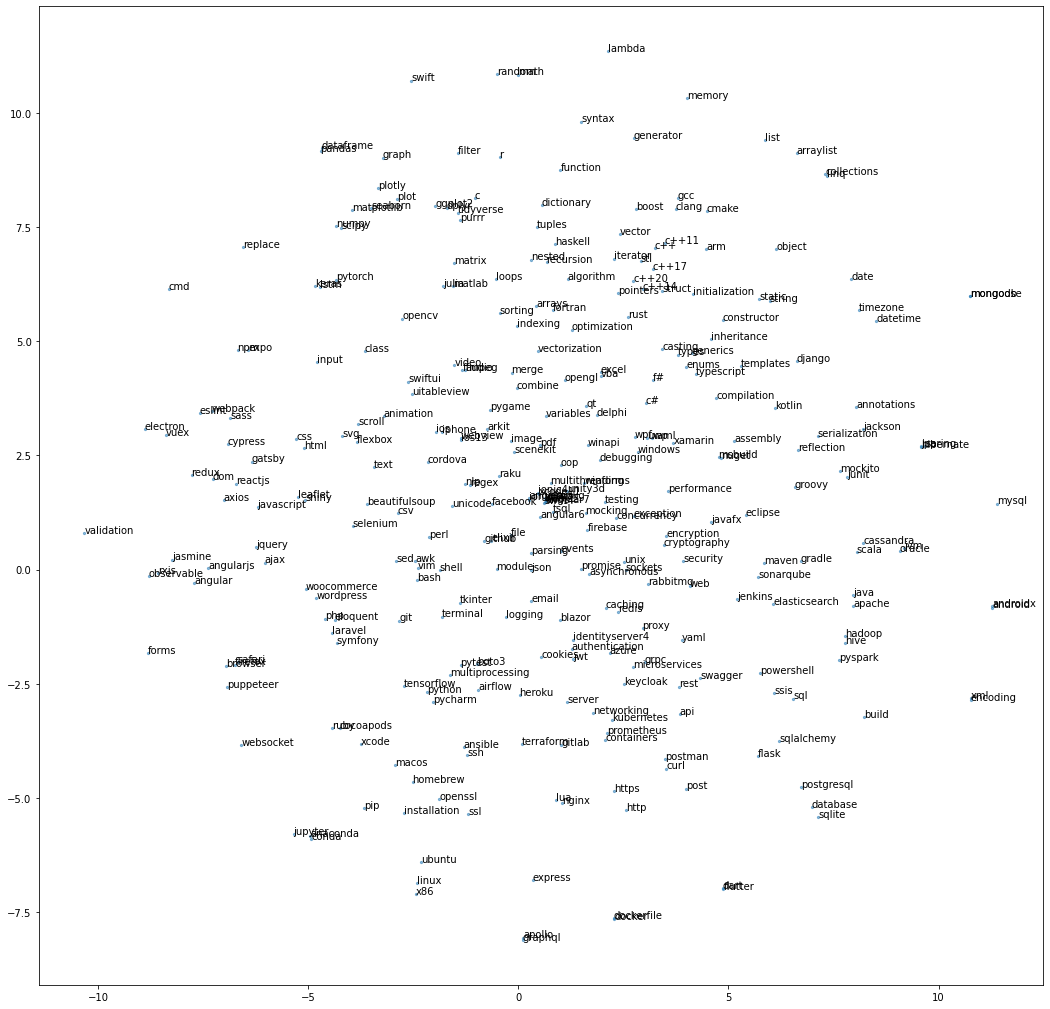

In [19]:
plt.figure(figsize=(18,18))
pyplot.scatter(result[:, 0], result[:, 1], s=5, alpha=0.5)
for i, word in enumerate(words):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(questions)
corpus = [dictionary.doc2bow(text) for text in questions]

In [ ]:
len(dictionary)

325

In [ ]:
corpus

[[(0, 1)],
 [(1, 2), (2, 1)],
 [(3, 1), (4, 1), (5, 4), (6, 2)],
 [(7, 1), (8, 2), (9, 6), (10, 3)],
 [(1, 3), (6, 1), (7, 1), (11, 5), (12, 4)],
 [(1, 3)],
 [(4, 4), (13, 2), (14, 2), (15, 2)],
 [(1, 8), (6, 2), (10, 1), (16, 18), (17, 1), (18, 9), (19, 1), (20, 14)],
 [(21, 2)],
 [(7, 23),
  (12, 1),
  (13, 12),
  (14, 2),
  (15, 2),
  (19, 1),
  (20, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 2),
  (26, 1),
  (27, 4),
  (28, 5),
  (29, 1),
  (30, 2),
  (31, 2),
  (32, 24),
  (33, 1),
  (34, 1),
  (35, 14),
  (36, 32)],
 [(37, 1), (38, 2), (39, 2), (40, 3)],
 [(41, 1)],
 [(10, 1), (16, 3), (18, 1), (42, 2), (43, 1), (44, 1), (45, 1)],
 [(1, 3),
  (12, 1),
  (13, 9),
  (19, 2),
  (30, 2),
  (32, 7),
  (38, 67),
  (46, 72),
  (47, 11),
  (48, 1),
  (49, 2),
  (50, 9),
  (51, 8),
  (52, 11),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 1),
  (57, 8),
  (58, 2),
  (59, 4),
  (60, 59),
  (61, 1),
  (62, 4)],
 [(7, 3), (41, 3), (46, 2), (63, 10)],
 [(6, 6), (10, 2), (18, 4), (33, 3), (50, 1), 

In [ ]:
lda = gensim.models.ldamodel.LdaModel

In [ ]:
ldamodel = lda(corpus, num_topics=5, id2word = dictionary, passes=50)

In [ ]:
print("LDA model is: \n", ldamodel.print_topics(num_topics=5, num_words=5))

LDA model is: 
 [(0, '0.178*"file" + 0.139*"c" + 0.057*"build" + 0.056*"python" + 0.048*"module"'), (1, '0.220*"java" + 0.077*"api" + 0.071*"server" + 0.047*"angular" + 0.044*"web"'), (2, '0.237*"android" + 0.209*"class" + 0.071*"html" + 0.041*"firebase" + 0.035*"text"'), (3, '0.156*"string" + 0.128*"function" + 0.098*"list" + 0.072*"class" + 0.069*"object"'), (4, '0.106*"text" + 0.106*"input" + 0.104*"image" + 0.069*"date" + 0.034*"dataframe"')]
